In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from factor_data import FactorData
from price_data import PriceData
from factor_model import FactorModel
from pca import PCA
from clustering import Cluster
from find_pairs import PairsTrade
from allocator import Allocator
from pma import PMA


from matplotlib import style
import matplotlib.pyplot as plt
plt.style.use('bmh')


Get Price Data from Local Folder
Generated Monthly Return.
Get Price Data from Local Folder
Generated Monthly Return.
Concatenated all factor dataframe

Running Time Series Regression......
                

718 of ticker's Time Series Factors have been generated.

-----------------------------------------------------------------------

                
Postprocessing Factor Data ......
        
        
Done.


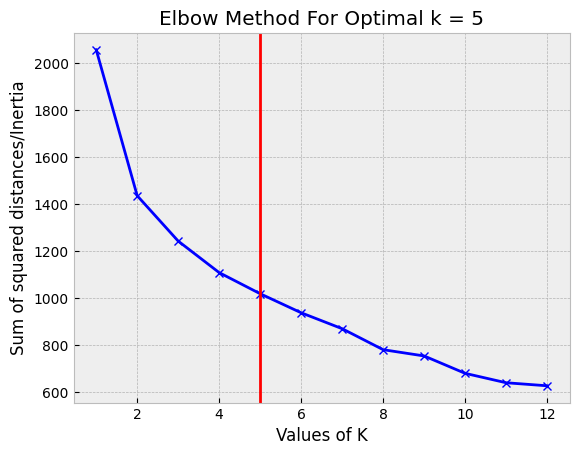

--------- Runing Cluster 0 ---------------
--------- Runing Cluster 1 ---------------
--------- Runing Cluster 2 ---------------
--------- Runing Cluster 3 ---------------
--------- Runing Cluster 4 ---------------


In [3]:
start = "2019-01-01"
end = "2021-01-01"

display = False

sample_data = PriceData(["all"], start=start, end=end, refresh=False)
lookback_data = PriceData(["all"], start='2021-01-01', end='2021-03-01',ticker_ref_date="2021-01-01", refresh=False)
factors = FactorData("all", frequency="m", start=start, end=end)



_factor_model = FactorModel(
                            sample_data.asset_return, 
                            factors.factor_data,
                            ts_pvalues_threshold=0.1,
                            factor_hard_cap=20,
                            coff_std_limit=5
)

_pca = PCA(_factor_model.clustering_coefficients)

cluster = Cluster(
                  _pca.pca,
                  method="GMM",
                  number_of_cluster=None,
                  graph=display
                )

pairs_trade = PairsTrade(
                         _factor_model,
                         cluster, 
                         sample_data, 
                         lookback_data,
                         allocation_date=end,
                         test_percentile=0.4,
                         display=display
                        )

In [4]:
allocator = Allocator(pairs_trade.pairs,trade_date='2022-01-01')

Get Price Data from Local Folder
Generated Monthly Return.


In [5]:
allocator.calculate_trades()

In [6]:
pma = PMA(1000000)

In [7]:
pma.add_to_pma(allocator.orders,allocator.info,'2022-01-01')

Sent Trade to Exchange....
Get Price Data from Local Folder
Generated Monthly Return.


,trade_id,ticker,number_of_shares,executed_price,trade_date,executed_total,P/L,latest_price
0,2022-01-01--0,STX,19.0,108.999394,2022-01-01,2070.988477,0,108.999394
1,2022-01-01--0,TJX,1323.0,74.311788,2022-01-01,98314.496040,0,74.311788
2,2022-01-01--1,CBH,-6176.0,8.957656,2022-01-01,-55322.481325,0,8.957656
3,2022-01-01--1,FMY,3485.0,12.800588,2022-01-01,44610.047490,0,12.800588


1001.590066661425

In [8]:
pma.allocation

,trade_id,ticker,number_of_shares,executed_price,executed_total,trade_date,latest_price,P/L
0,2022-01-01--0,STX,19.0,108.999394,2070.988477,2022-01-01,108.999394,0
1,2022-01-01--0,TJX,1323.0,74.311788,98314.496040,2022-01-01,74.311788,0
2,2022-01-01--1,CBH,-6176.0,8.957656,-55322.481325,2022-01-01,8.957656,0
3,2022-01-01--1,FMY,3485.0,12.800588,44610.047490,2022-01-01,12.800588,0
